# Repte 3

## Definició del problema

Es vol predir el consum de combustible de diferents models de cotxes dels anys 70. Per fer-ho disposem d'un *dataset* amb diferents aspectes tècnics dels diferents models i el seu consum. Aquestes són les dades que conté:


*   Miles per Gallon (mpg): *variable contínua*
*   cylinders: *variable discreta de valors múltiples*
*   displacement: *variable contínua*
*   horsepower: *variable contínua*
*   weight: *variable contínua*
*   acceleration: *variable contínua*
*   model year: *variable discreta de valors múltiples*
*   origin: *variable categòrica*

Aquest dataset es pot descarregar de [https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data](https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data)

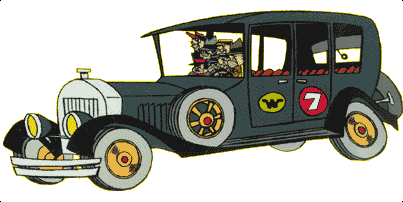

## Preparació de les dades

In [48]:
# Importa les llibreries que necessitaràs
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense


In [49]:
# Descarrega el dataset fent servir el packet urllib de Python i guarda-ho
# amb el nom auto-mpg.data
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/root/.keras/datasets/auto-mpg.data'

In [50]:
# Importa el dataset descarregat com a csv, afegint els noms de les columnes i
# ajustant els paràmetres na_values, comment, sep, skipinitialspace, etc.
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,na_values = "?", comment='\t',sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()

# Mostra les últimes 5 fil·les
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [51]:
# Comprova si falta algun valor a tot el conjunt de dades
print('existen falsos :',dataset.isnull().values.any())
print('total de nan o null :',dataset.isnull().sum().sum())

existen falsos : True
total de nan o null : 6


In [52]:
# No podem alimentar la xarxa neuronal amb cap valor de tipus Nan, Null o ? així
# que en cas de que es doni aquesta situació, eliminarem aquestes files per obtenir
# un dataset sense errors.
#
# Elimina les files afectades per aquests errors
dataset = dataset.dropna()
print('existen falsos :',dataset.isnull().values.any())
print('total de nan o null :',dataset.isnull().sum().sum())

existen falsos : False
total de nan o null : 0


In [53]:
# La columna origin ens indica l'origen del vehicle on: 1-USA, 2-Europa, 3-Japan
# Aquesta és una variable categòrica que haurem de convertir a un vector booleà
# fent ús de la codificació one-hot encoding.
#
# Crea 3 noves columnes (USA, Europe, Japan) amb valor 1 o 0 en funció de la columna
# Origin. Pots fer servir el mètode pop() de Pandas (elimina la columna y la guarda en una variant)
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [54]:
# Separa les dades per tal d'obtenir un dataset_train amb el 80% de les mostres i
# un dataset_test amb el 20%. Pots fer servir la funció sample() de Pandas.
dataset_train = dataset.sample(frac=0.8,random_state=0)
dataset_test = dataset.drop(dataset_train.index)

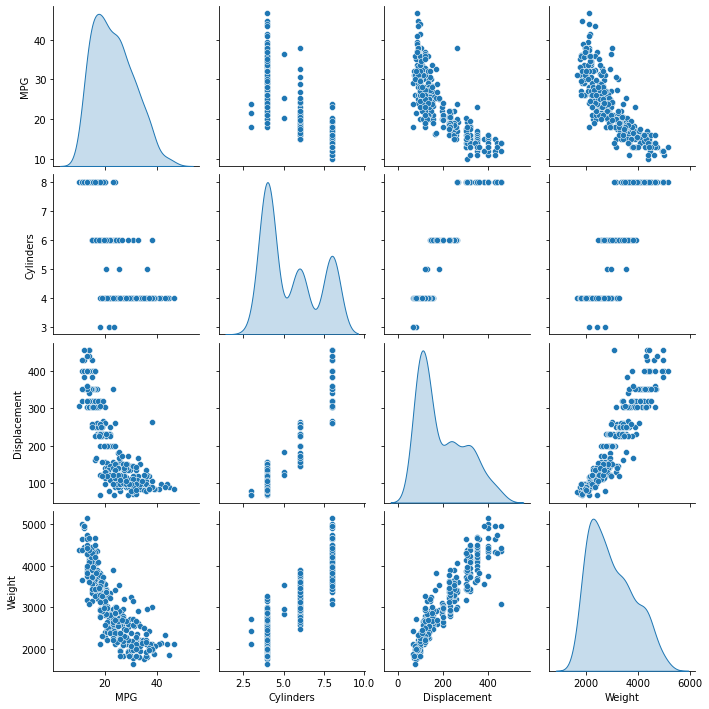

              count         mean         std     min      25%     50%  \
Cylinders     314.0     5.477707    1.699788     3.0     4.00     4.0   
Displacement  314.0   195.318471  104.331589    68.0   105.50   151.0   
Horsepower    314.0   104.869427   38.096214    46.0    76.25    94.5   
Weight        314.0  2990.251592  843.898596  1649.0  2256.50  2822.5   
Acceleration  314.0    15.559236    2.789230     8.0    13.80    15.5   
Model Year    314.0    75.898089    3.675642    70.0    73.00    76.0   
USA           314.0     0.624204    0.485101     0.0     0.00     1.0   
Europe        314.0     0.178344    0.383413     0.0     0.00     0.0   
Japan         314.0     0.197452    0.398712     0.0     0.00     0.0   

                  75%     max  
Cylinders        8.00     8.0  
Displacement   265.75   455.0  
Horsepower     128.00   225.0  
Weight        3608.00  5140.0  
Acceleration    17.20    24.8  
Model Year      79.00    82.0  
USA              1.00     1.0  
Europe       

In [55]:
# Mostra les principals característiques estadístiques per a cada columna i
sns.pairplot(dataset_train[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")
plt.show()
# guarda-les a la variable train_stats de forma trasposada(cambiar filas x columnas)
train_stats = dataset_train.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
print(train_stats)

train_labels = dataset_train.pop('MPG')
test_labels = dataset_test.pop('MPG')



### Pregunta 1
Observant les dades estadístiques, creus que és convenient normalitzar les dades? Raona la resposta.


In [56]:
# Aquesta funció reescala les característiques en un rang de 0 a 1 (normalització)
# i les centra al 0 (estandarització) amb una desviació estàndard de 1

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

# Aplica la funció anterior a les dades d'entrenament i de prova
norm_dataset_train = norm(dataset_train)
norm_dataset_test = norm(dataset_test)

In [57]:
# Comprova la normalització revisant les estadístiques de les dades
print(norm_dataset_train)

     Cylinders  Displacement  Horsepower    Weight  Acceleration  Model Year  \
146  -0.869348     -1.009459   -0.784052 -1.025303     -0.379759   -0.516397   
282  -0.869348     -0.530218   -0.442811 -0.118796      0.624102    0.843910   
69    1.483887      1.482595    1.447140  1.736877     -0.738281   -1.060519   
378  -0.869348     -0.865687   -1.099044 -1.025303     -0.308055    1.660094   
331  -0.869348     -0.942365   -0.994047 -1.001603      0.875068    1.115971   
..         ...           ...         ...       ...           ...         ...   
281   0.307270      0.044872   -0.521559 -0.000298      0.946772    0.843910   
229   1.483887      1.961837    1.972127  1.457223     -1.598734    0.299787   
150  -0.869348     -0.836932   -0.311564 -0.710099     -0.021237   -0.516397   
145  -0.869348     -1.076553   -1.151543 -1.169870      1.233589   -0.516397   
182  -0.869348     -0.846517   -0.495310 -0.623596     -0.021237    0.027726   

          USA    Europe     Japan  
146

### Pregunta 2
Com podem saber que hem realitzat bé la normalització a partir de la informació estadística?

perque els resultats no varian masa del 0 y 1

## Definició del model
### Pregunta 3
Quin tipus de problema és? Regressió, classificació binària o classificació múltiple? Raona la resposta

Es un problema de regressión.
El objetivo de un problema de regresión es predecir el valor de una variable numérica basándose en los valores de una o varias variables predictoras, que pueden ser numéricas o categóricas.

### Pregunta 4
Quàntes neurones i amb quina funció d'activació haurà de tenir la capa de sortida? Raona la resposta.

In [58]:
# Crea un model de xarxa neuronal de tipus Dense amb 2 capes de 64 neurones amb
# funció d'activació 'relu' i una capa de sortida

model = Sequential()
model.add(Dense(64,activation = 'relu',input_shape=[len(dataset_train.keys())]))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1))

In [59]:
# Configura i executa l'entrenament del model. Hauràs d'escollir la funció de pèrdua
# adient en funció del tipus de problema a resoldre (Pregunta 3).
# Farem servir les mètriques 'root mean square error' i 'mean absolute error'.
# Afegeix l'hiperparàmetre validation_split=0.2 a la funció fit()
'''
MAE és més robusta quan tenim valors atípics ja que no fa servir el quadrat de
l'error mentre que MSE és més útil si volem donar més importància als errors grans.
'''
model.compile(loss='mean_squared_error',optimizer='RMSprop', metrics=['mean_absolute_error', 'mean_squared_error'])

model.summary()

example_batch = norm_dataset_train[:10]
example_result = model.predict(example_batch)
example_result

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                640       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 82ms/step


array([[ 0.00596094],
       [-0.06816442],
       [ 0.11875606],
       [ 0.1521708 ],
       [ 1.2170472 ],
       [-0.09727347],
       [ 1.2206523 ],
       [ 0.5018192 ],
       [-0.12163039],
       [ 0.86678165]], dtype=float32)

In [60]:
# Fes una evaluació del model amb les dades de test
model.fit(norm_dataset_train, train_labels, epochs=100, validation_split = 0.2, verbose=1)

loss, mae, mse = model.evaluate(norm_dataset_test, test_labels, verbose=0)

print("Conjunt de proves Mean Abs Error: {:5.2f} MPG".format(mae))

Epoch 1/100
8/8 [==============================] - 1s 31ms/step - loss: 542.3918 - mean_absolute_error: 22.1320 - mean_squared_error: 542.3918 - val_loss: 517.7529 - val_mean_absolute_error: 21.6345 - val_mean_squared_error: 517.7529
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 477.2148 - mean_absolute_error: 20.7348 - mean_squared_error: 477.2148 - val_loss: 449.0861 - val_mean_absolute_error: 20.1203 - val_mean_squared_error: 449.0861
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 413.9976 - mean_absolute_error: 19.2795 - mean_squared_error: 413.9976 - val_loss: 377.4607 - val_mean_absolute_error: 18.3843 - val_mean_squared_error: 377.4607
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 349.8842 - mean_absolute_error: 17.6558 - mean_squared_error: 349.8842 - val_loss: 307.3710 - val_mean_absolute_error: 16.4714 - val_mean_squared_error: 307.3710
Epoch 5/100
8/8 [==============================] - 0s 10ms/step - l

### Pregunta 5
Quin significat tenen els números obtinguts a **mae** i **mse**? Diríes que és un error acceptable? Per què?

## Predicció

In [61]:
# Realitza la predicció d'un suposat cotxe amb:
#   4 cilindres
#   Desplaçament 100
#   50 C.V.
#   1500 kg
#   Acceleració 10 m/s^2
#   Any 82
#   Europeu

datos = norm([4,100,50,1500,10,82,0,1,0]).to_frame('mean').transpose()
test_predictions = model.predict(datos)
print(test_predictions)


1/1 [==============================] - 0s 22ms/step
[[43.156075]]
